In [7]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input

In [8]:
model = load_model(r'C:\Users\prash\Desktop\data\Crop recommendation\model_vgg16_1.h5')

In [6]:
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    (h, w) = frame.shape[:2]
    #frame = np.array(frame)
    
    #if type(frame) is np.ndarray:
    frame = cv2.resize(frame, (224,224))
    frame = img_to_array(frame) / 255.0
    frame = np.expand_dims(frame, axis=0)
    pred = model.predict(frame)[0]
    (startX, startY, endX, endY) = pred
    
    startX = int(startX * w)
    startY = int(startY * h)
    endX = int(endX * w)
    endY = int(endY * h)

    name = "None Matching"

    if (pred[0][0]>0.5):
        name = "diseased cotton leaf"
        cv2.rectangle(frame, (startX, startY), (endX, endY),(0, 255, 0), 2)
        cv2.putText(frame, name, (100,100), cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
    elif (pred[0][1]>0.5):
        name = "diseased cotton plant"
        cv2.rectangle(frame, (startX, startY), (endX, endY),(0, 255, 0), 2)
        cv2.putText(frame, name, (100,100), cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
    elif (pred[0][2]>0.5):
        name = "fresh cotton leaf"
        cv2.rectangle(frame, (startX, startY), (endX, endY),(0, 255, 0), 2)
        cv2.putText(frame, name, (100,100), cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
    else:
        name = "fresh cotton plant"
        cv2.rectangle(frame, (startX, startY), (endX, endY),(0, 255, 0), 2)
        cv2.putText(frame, name, (100,100), cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
#else:
#    cv2.putText(frame, "Not Found", (50,50), cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)

    cv2.imshow("Video", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

ValueError: not enough values to unpack (expected 4, got 1)

In [13]:
cap = cv2.VideoCapture(0)

while True:
    _, img = cap.read()
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    #ret, thresh = cv2.threshold(img,110,255,cv2.THRESH_BINARY)
    #img = image.img_to_array(img)
    #img = np.expand_dims(img, axis=0)
    #img = preprocess_input(img)
    pred = model.predict(img)
    

    name = "None Matching"

    if (pred[0][0]>0.5):
        name = "diseased cotton leaf"
        cv2.rectangle(img, (25,25),(200, 200),(0,0,255),2)
        cv2.putText(img, name, (10,10), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 0, 0))
    elif (pred[0][1]>0.5):
        cv2.rectangle(img, (25,25),(200, 200),(0,0,255),2)
        cv2.putText(img, name, (10,10), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 0, 0))
    elif (pred[0][2]>0.5):
        name = "fresh cotton leaf"
        cv2.rectangle(img, (25,25),(200, 200),(0,0,255),2)
        cv2.putText(img, name, (10,10), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 0, 0))
    else:
        name = "fresh cotton plant"
        cv2.rectangle(img, (25,25),(200, 200),(0,0,255),2)
        cv2.putText(img, name, (10,10), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 0, 0))
#else:
#    cv2.putText(frame, "Not Found", (50,50), cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)

    cv2.imshow("Video", img)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

ValueError: in user code:

    C:\Users\prash\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\prash\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\prash\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\prash\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\prash\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\prash\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\prash\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\prash\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\prash\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)


In [36]:
import cv2
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

0


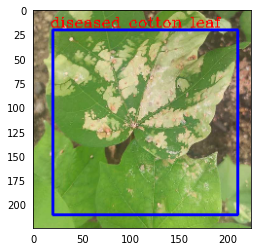

In [41]:
model = load_model(r'C:\Users\prash\Desktop\data\Crop recommendation\model_vgg16_1.h5')
img = cv2.imread(r"C:\Users\prash\Desktop\data\cotton plant leaf disease\train2\diseased cotton leaf\dis_leaf (31)_iaip.jpg")
img1 = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)
pred = np.argmax(model.predict(img))
print(pred)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1, (224,224))
if (pred == [0]):
    name = "diseased cotton leaf"
    cv2.rectangle(img1, (20,20),(210, 210),(0,0,255),2)
    cv2.putText(img1, name, (17,17), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 0, 0))
elif (pred == [1]):
    cv2.rectangle(img1, (20,20),(210, 210),(0,0,255),2)
    cv2.putText(img1, name, (17,17), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 0, 0))
elif (pred == [2]):
    name = "fresh cotton leaf"
    cv2.rectangle(img1, (20,20),(210, 210),(0,0,255),2)
    cv2.putText(img1, name, (17,17), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 0, 0))
else:
    name = "fresh cotton plant"
    cv2.rectangle(img1, (20,20),(210, 210),(0,0,255),2)
    cv2.putText(img1, name, (17,17), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 0, 0))

plt.tick_params(left = False, bottom = False)
plt.imshow(img1)


In [ ]:
cv2.rectangle(img, (25,25),(200, 200),(0,0,255),2)
cv2.putText(img, 'Apple', (10,10), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 0, 0))
plt.imshow(img)

In [155]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input

cap = cv2.VideoCapture(0)

while True:
    
    _, img = cap.read()
    
    model = load_model(r'C:\Users\prash\Desktop\data\Crop recommendation\model_vgg16_1.h5')
    #img = cv2.imread(r"C:\Users\prash\Desktop\data\cotton plant leaf disease\train2\diseased cotton leaf\dis_leaf (31)_iaip.jpg")
    img1 = img.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    pred = np.argmax(model.predict(img))
    print(pred)
    
    
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img1 = cv2.resize(img1, (224,224))
    lower = np.array([60,60,60])
    higher = np.array([250,250,250])
    mask = cv2.inRange(img1, lower, higher)
    cnt,_ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    cnt_img = cv2.drawContours(img1, cnt, -1,255,3)
    c = max(cnt, key = cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)
    
    if (pred == [0]):
        name = "Diseased cotton leaf"
        cv2.rectangle(img1, (x,y),(x+w, y+h),(255,0,0),2)
        cv2.putText(img1, name, (x,y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255))
    elif (pred == [1]):
        name = "Diseased cotton plant"
        cv2.rectangle(img1, (20,20),(210, 210),(255,0,0),2)
        cv2.putText(img1, name, (17,17), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255))
    elif (pred == [2]):
        name = "Fresh cotton leaf"
        cv2.rectangle(img1, (20,20),(210, 210),(255,0,0),2)
        cv2.putText(img1, name, (17,17), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255))
    else:
        name = "Fresh cotton plant"
        cv2.rectangle(img1, (20,20),(210, 210),(255,0,0),2)
        cv2.putText(img1, name, (17,17), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255))
    
    
    cv2.imshow("Video", img1)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

2
2
2
2
0
0
0
0
0
0
0
2
0
0


In [121]:
import tensorflow as tf

In [122]:
tf.__version__

'2.4.1'

548 630 3 1


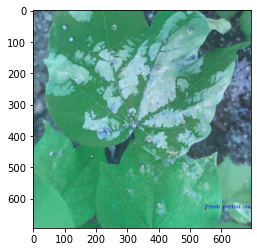

In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

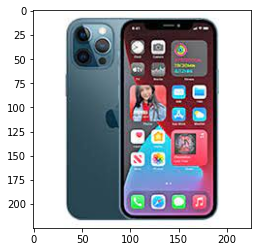

In [12]:
#img = cv2.imread(r"C:\Users\prash\Desktop\data\crop types\train\Apple\apple 33.jpg")
img = cv2.imread(r"F:\MACHINE_LEARNING\CUSTOM_OBJECT_DETECTION\train\Mobile\mobile 1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = img.copy()
plt.imshow(img)

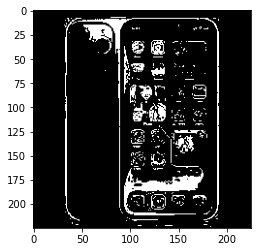

In [13]:
lower = np.array([120,120,120])
higher = np.array([250,250,250])
mask = cv2.inRange(img, lower, higher)
plt.imshow(mask,'gray')

In [151]:
#ret, thresh = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
#plt.imshow(thresh,'gray')

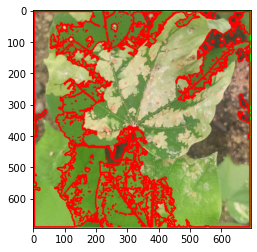

In [152]:
cnt,_ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnt_img = cv2.drawContours(img, cnt, -1,255,3)
plt.imshow(cnt_img)

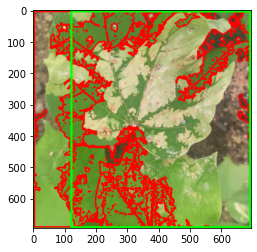

In [153]:
c = max(cnt, key = cv2.contourArea)
x,y,w,h = cv2.boundingRect(c)
cv2.rectangle(img, (x,y),(x+w, y+h),(0,255,0),5)
plt.imshow(img)